<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/fraud_detection_project%20/notebook/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

print("Select ALL 8 of your CSV files to upload:")
uploaded = files.upload()

print("\nFiles uploaded successfully!")

Select ALL 8 of your CSV files to upload:


Saving Train_Outpatientdata-1542865627584.csv to Train_Outpatientdata-1542865627584 (1).csv
Saving Train_Beneficiarydata-1542865627584.csv to Train_Beneficiarydata-1542865627584 (1).csv
Saving Train_Inpatientdata-1542865627584.csv to Train_Inpatientdata-1542865627584 (1).csv
Saving Test_Beneficiarydata-1542969243754.csv to Test_Beneficiarydata-1542969243754 (1).csv
Saving Test_Inpatientdata-1542969243754.csv to Test_Inpatientdata-1542969243754 (1).csv
Saving Test_Outpatientdata-1542969243754.csv to Test_Outpatientdata-1542969243754 (1).csv
Saving Test-1542969243754.csv to Test-1542969243754 (1).csv
Saving Train-1542865627584.csv to Train-1542865627584 (1).csv

Files uploaded successfully!


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load TRAINING data
train_beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train_labels = pd.read_csv('Train-1542865627584.csv')

# Load TEST data
test_beneficiary = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
test_labels = pd.read_csv('Test-1542969243754.csv')

print("=== TRAINING DATA ===")
print(f"Train Beneficiary: {train_beneficiary.shape[0]} rows, {train_beneficiary.shape[1]} columns")
print(f"Train Inpatient: {train_inpatient.shape[0]} rows, {train_inpatient.shape[1]} columns")
print(f"Train Outpatient: {train_outpatient.shape[0]} rows, {train_outpatient.shape[1]} columns")
print(f"Train Labels: {train_labels.shape[0]} rows, {train_labels.shape[1]} columns")

print("\n=== TEST DATA ===")
print(f"Test Beneficiary: {test_beneficiary.shape[0]} rows, {test_beneficiary.shape[1]} columns")
print(f"Test Inpatient: {test_inpatient.shape[0]} rows, {test_inpatient.shape[1]} columns")
print(f"Test Outpatient: {test_outpatient.shape[0]} rows, {test_outpatient.shape[1]} columns")
print(f"Test Labels: {test_labels.shape[0]} rows, {test_labels.shape[1]} columns")

print("\n✓ All data loaded successfully!")

=== TRAINING DATA ===
Train Beneficiary: 138556 rows, 25 columns
Train Inpatient: 40474 rows, 30 columns
Train Outpatient: 517737 rows, 27 columns
Train Labels: 5410 rows, 2 columns

=== TEST DATA ===
Test Beneficiary: 63968 rows, 25 columns
Test Inpatient: 9551 rows, 30 columns
Test Outpatient: 125841 rows, 27 columns
Test Labels: 1353 rows, 1 columns

✓ All data loaded successfully!


In [ ]:
# Check what's in test labels
print("=== TRAIN LABELS ===")
print(train_labels.head())
print(f"\nColumns: {train_labels.columns.tolist()}")

print("\n=== TEST LABELS ===")
print(test_labels.head())
print(f"\nColumns: {test_labels.columns.tolist()}")

=== TRAIN LABELS ===
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

Columns: ['Provider', 'PotentialFraud']

=== TEST LABELS ===
   Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018

Columns: ['Provider']


In [ ]:
# Check fraud distribution in training data
print("=== FRAUD DISTRIBUTION (TRAINING) ===")
print(train_labels['PotentialFraud'].value_counts())
print("\nPercentages:")
print(round(train_labels['PotentialFraud'].value_counts(normalize=True) * 100, 2))

=== FRAUD DISTRIBUTION (TRAINING) ===
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Percentages:
PotentialFraud
No     90.65
Yes     9.35
Name: proportion, dtype: float64


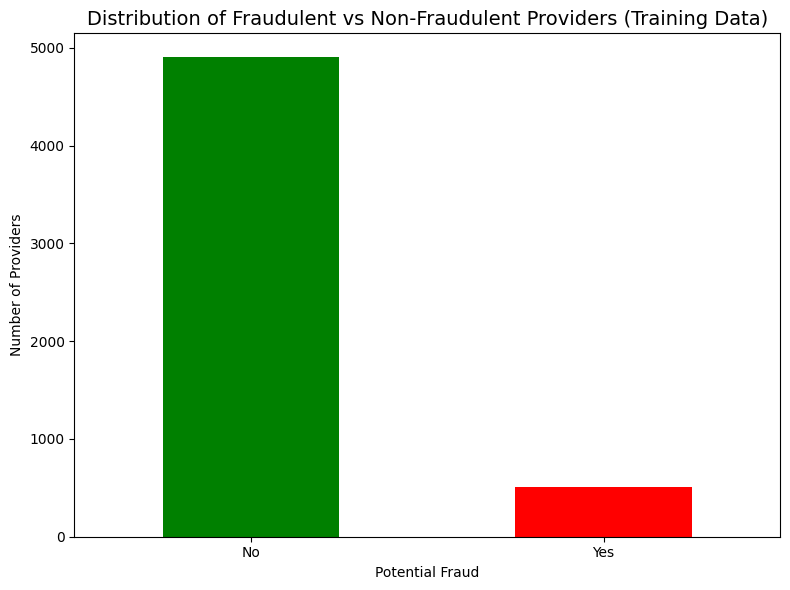


⚠️ Note: The data is IMBALANCED - many more non-fraudulent than fraudulent providers!


In [ ]:
# Plot the fraud distribution
plt.figure(figsize=(8, 6))
colors = ['green', 'red']
train_labels['PotentialFraud'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Providers (Training Data)', fontsize=14)
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n⚠️ Note: The data is IMBALANCED - many more non-fraudulent than fraudulent providers!")

In [ ]:
# Look at beneficiary data (patient information)
print("=== BENEFICIARY DATA (TRAINING) ===")
print(train_beneficiary.head())
print(f"\nColumns: {train_beneficiary.columns.tolist()}")

=== BENEFICIARY DATA (TRAINING) ===
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                     

In [ ]:
# Check missing values in beneficiary data
print("=== MISSING VALUES IN BENEFICIARY DATA ===")
missing = train_beneficiary.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values!")

=== MISSING VALUES IN BENEFICIARY DATA ===
DOD    137135
dtype: int64


In [ ]:
# Look at inpatient data (hospital admissions)
print("=== INPATIENT DATA (TRAINING) ===")
print(train_inpatient.head())
print(f"\nColumns: {train_inpatient.columns.tolist()}")

=== INPATIENT DATA (TRAINING) ===
      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...           

In [ ]:
# Check missing values in inpatient data
print("=== MISSING VALUES IN INPATIENT DATA ===")
missing = train_inpatient.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values!")

=== MISSING VALUES IN INPATIENT DATA ===
AttendingPhysician       112
OperatingPhysician     16644
OtherPhysician         35784
DeductibleAmtPaid        899
ClmDiagnosisCode_2       226
ClmDiagnosisCode_3       676
ClmDiagnosisCode_4      1534
ClmDiagnosisCode_5      2894
ClmDiagnosisCode_6      4838
ClmDiagnosisCode_7      7258
ClmDiagnosisCode_8      9942
ClmDiagnosisCode_9     13497
ClmDiagnosisCode_10    36547
ClmProcedureCode_1     17326
ClmProcedureCode_2     35020
ClmProcedureCode_3     39509
ClmProcedureCode_4     40358
ClmProcedureCode_5     40465
ClmProcedureCode_6     40474
dtype: int64


In [ ]:
# Look at outpatient data (clinic visits)
print("=== OUTPATIENT DATA (TRAINING) ===")
print(train_outpatient.head())
print(f"\nColumns: {train_outpatient.columns.tolist()}")

=== OUTPATIENT DATA (TRAINING) ===
      BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   


In [ ]:
# Check missing values in outpatient data
print("=== MISSING VALUES IN OUTPATIENT DATA ===")
missing = train_outpatient.isnull().sum()
missing = missing[missing > 0]
if len(missing) > 0:
    print(missing)
else:
    print("No missing values!")

=== MISSING VALUES IN OUTPATIENT DATA ===
AttendingPhysician         1396
OperatingPhysician       427120
OtherPhysician           322691
ClmDiagnosisCode_1        10453
ClmDiagnosisCode_2       195380
ClmDiagnosisCode_3       314480
ClmDiagnosisCode_4       392141
ClmDiagnosisCode_5       443393
ClmDiagnosisCode_6       468981
ClmDiagnosisCode_7       484776
ClmDiagnosisCode_8       494825
ClmDiagnosisCode_9       502899
ClmDiagnosisCode_10      516654
ClmProcedureCode_1       517575
ClmProcedureCode_2       517701
ClmProcedureCode_3       517733
ClmProcedureCode_4       517735
ClmProcedureCode_5       517737
ClmProcedureCode_6       517737
ClmAdmitDiagnosisCode    412312
dtype: int64


In [ ]:
# Understand how the data connects
print("=== HOW THE DATA CONNECTS ===")

print("\n1. LABELS table:")
print(f"   - Unique Providers: {train_labels['Provider'].nunique()}")

print("\n2. INPATIENT table:")
print(f"   - Unique Providers: {train_inpatient['Provider'].nunique()}")
print(f"   - Unique Patients (BeneID): {train_inpatient['BeneID'].nunique()}")

print("\n3. OUTPATIENT table:")
print(f"   - Unique Providers: {train_outpatient['Provider'].nunique()}")
print(f"   - Unique Patients (BeneID): {train_outpatient['BeneID'].nunique()}")

print("\n4. BENEFICIARY table:")
print(f"   - Unique Patients (BeneID): {train_beneficiary['BeneID'].nunique()}")

print("\n" + "=" * 50)
print("CONNECTION MAP:")
print("Labels --(Provider)--> Inpatient/Outpatient --(BeneID)--> Beneficiary")
print("=" * 50)

=== HOW THE DATA CONNECTS ===

1. LABELS table:
   - Unique Providers: 5410

2. INPATIENT table:
   - Unique Providers: 2092
   - Unique Patients (BeneID): 31289

3. OUTPATIENT table:
   - Unique Providers: 5012
   - Unique Patients (BeneID): 133980

4. BENEFICIARY table:
   - Unique Patients (BeneID): 138556

CONNECTION MAP:
Labels --(Provider)--> Inpatient/Outpatient --(BeneID)--> Beneficiary


In [ ]:
# Merge inpatient data with labels
train_inpatient_labeled = train_inpatient.merge(train_labels, on='Provider', how='left')

print("=== CLAIM AMOUNTS BY FRAUD STATUS ===")
print(train_inpatient_labeled.groupby('PotentialFraud')['InscClaimAmtReimbursed'].describe())

=== CLAIM AMOUNTS BY FRAUD STATUS ===
                  count          mean           std  min     25%     50%  \
PotentialFraud                                                             
No              17072.0   9782.597821   9767.276716  0.0  4000.0  7000.0   
Yes             23402.0  10310.593539  10671.735902  0.0  4000.0  7000.0   

                    75%       max  
PotentialFraud                     
No              11000.0  125000.0  
Yes             12000.0  125000.0  


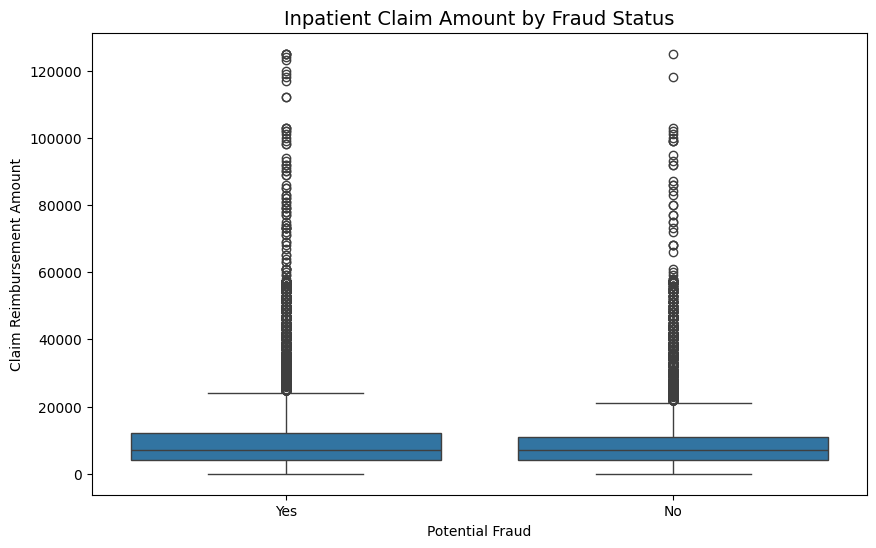

In [ ]:
# Plot claim amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_inpatient_labeled, x='PotentialFraud', y='InscClaimAmtReimbursed')
plt.title('Inpatient Claim Amount by Fraud Status', fontsize=14)
plt.xlabel('Potential Fraud')
plt.ylabel('Claim Reimbursement Amount')
plt.show()

In [ ]:
# FEATURE ENGINEERING
print("=== CREATING PROVIDER-LEVEL FEATURES ===")
print("This may take a moment...")

# Mark claim types
train_inpatient['ClaimType'] = 'Inpatient'
train_outpatient['ClaimType'] = 'Outpatient'

# Combine inpatient and outpatient
train_all_claims = pd.concat([train_inpatient, train_outpatient], ignore_index=True)

print(f"Total training claims: {len(train_all_claims)}")

=== CREATING PROVIDER-LEVEL FEATURES ===
This may take a moment...
Total training claims: 558211


In [ ]:
# Create provider-level features
provider_features = train_all_claims.groupby('Provider').agg({
    'ClaimID': 'count',
    'BeneID': 'nunique',
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max', 'min'],
    'DeductibleAmtPaid': ['sum', 'mean'],
    'ClaimType': lambda x: (x == 'Inpatient').sum(),
}).reset_index()

# Flatten column names
provider_features.columns = [
    'Provider',
    'TotalClaims',
    'UniquePatients',
    'TotalReimbursed',
    'AvgReimbursed',
    'StdReimbursed',
    'MaxReimbursed',
    'MinReimbursed',
    'TotalDeductible',
    'AvgDeductible',
    'InpatientClaims'
]

print("Basic provider features created!")
print(provider_features.head())

Basic provider features created!
   Provider  TotalClaims  UniquePatients  TotalReimbursed  AvgReimbursed  \
0  PRV51001           25              24           104640    4185.600000   
1  PRV51003          132             117           605670    4588.409091   
2  PRV51004          149             138            52170     350.134228   
3  PRV51005         1165             495           280910     241.124464   
4  PRV51007           72              58            33710     468.194444   

   StdReimbursed  MaxReimbursed  MinReimbursed  TotalDeductible  \
0   10796.091144          42000             10           5340.0   
1    7309.794729          57000              0          66286.0   
2     689.963754           3300              0            310.0   
3     491.556392           4080              0           3700.0   
4    1433.769116          10000              0           3264.0   

   AvgDeductible  InpatientClaims  
0     213.600000                5  
1     502.166667               62  

In [ ]:
# Add more calculated features
provider_features['OutpatientClaims'] = provider_features['TotalClaims'] - provider_features['InpatientClaims']
provider_features['ClaimsPerPatient'] = provider_features['TotalClaims'] / provider_features['UniquePatients']
provider_features['AvgReimbursedPerPatient'] = provider_features['TotalReimbursed'] / provider_features['UniquePatients']
provider_features['InpatientRatio'] = provider_features['InpatientClaims'] / provider_features['TotalClaims']
provider_features['OutpatientRatio'] = provider_features['OutpatientClaims'] / provider_features['TotalClaims']

# Fill NaN with 0
provider_features = provider_features.fillna(0)

print("Additional features created!")
print(f"Total features: {len(provider_features.columns) - 1}")
print(provider_features.head())

Additional features created!
Total features: 15
   Provider  TotalClaims  UniquePatients  TotalReimbursed  AvgReimbursed  \
0  PRV51001           25              24           104640    4185.600000   
1  PRV51003          132             117           605670    4588.409091   
2  PRV51004          149             138            52170     350.134228   
3  PRV51005         1165             495           280910     241.124464   
4  PRV51007           72              58            33710     468.194444   

   StdReimbursed  MaxReimbursed  MinReimbursed  TotalDeductible  \
0   10796.091144          42000             10           5340.0   
1    7309.794729          57000              0          66286.0   
2     689.963754           3300              0            310.0   
3     491.556392           4080              0           3700.0   
4    1433.769116          10000              0           3264.0   

   AvgDeductible  InpatientClaims  OutpatientClaims  ClaimsPerPatient  \
0     213.600000   

In [ ]:
# Merge claims with beneficiary data
train_claims_with_bene = train_all_claims.merge(train_beneficiary, on='BeneID', how='left')

print(f"Claims merged with beneficiary data: {len(train_claims_with_bene)} rows")

# Get chronic condition columns
chronic_cols = [col for col in train_beneficiary.columns if 'Chronic' in col]
print(f"\nChronic condition columns found: {len(chronic_cols)}")
for col in chronic_cols:
    print(f"  - {col}")

Claims merged with beneficiary data: 558211 rows

Chronic condition columns found: 11
  - ChronicCond_Alzheimer
  - ChronicCond_Heartfailure
  - ChronicCond_KidneyDisease
  - ChronicCond_Cancer
  - ChronicCond_ObstrPulmonary
  - ChronicCond_Depression
  - ChronicCond_Diabetes
  - ChronicCond_IschemicHeart
  - ChronicCond_Osteoporasis
  - ChronicCond_rheumatoidarthritis
  - ChronicCond_stroke


In [ ]:
# Create patient features per provider
patient_features = train_claims_with_bene.groupby('Provider').agg({
    col: lambda x: (x == 1).mean() for col in chronic_cols
}).reset_index()

# Rename columns
new_col_names = ['Provider'] + [col.replace('ChronicCond_', '') + '_Rate' for col in chronic_cols]
patient_features.columns = new_col_names

print("Patient features created!")
print(patient_features.head())

Patient features created!
   Provider  Alzheimer_Rate  Heartfailure_Rate  KidneyDisease_Rate  \
0  PRV51001        0.600000           0.760000            0.680000   
1  PRV51003        0.424242           0.606061            0.484848   
2  PRV51004        0.429530           0.590604            0.335570   
3  PRV51005        0.365665           0.583691            0.435193   
4  PRV51007        0.361111           0.555556            0.305556   

   Cancer_Rate  ObstrPulmonary_Rate  Depression_Rate  Diabetes_Rate  \
0     0.200000             0.400000         0.360000       0.840000   
1     0.075758             0.310606         0.409091       0.757576   
2     0.107383             0.275168         0.422819       0.704698   
3     0.141631             0.253219         0.416309       0.685837   
4     0.166667             0.222222         0.402778       0.680556   

   IschemicHeart_Rate  Osteoporasis_Rate  rheumatoidarthritis_Rate  \
0            0.920000           0.240000                

In [ ]:
# Merge provider features with patient features
train_features = provider_features.merge(patient_features, on='Provider', how='left')
train_features = train_features.fillna(0)

print(f"Combined features shape: {train_features.shape}")
print(f"Features: {train_features.columns.tolist()}")

Combined features shape: (5410, 27)
Features: ['Provider', 'TotalClaims', 'UniquePatients', 'TotalReimbursed', 'AvgReimbursed', 'StdReimbursed', 'MaxReimbursed', 'MinReimbursed', 'TotalDeductible', 'AvgDeductible', 'InpatientClaims', 'OutpatientClaims', 'ClaimsPerPatient', 'AvgReimbursedPerPatient', 'InpatientRatio', 'OutpatientRatio', 'Alzheimer_Rate', 'Heartfailure_Rate', 'KidneyDisease_Rate', 'Cancer_Rate', 'ObstrPulmonary_Rate', 'Depression_Rate', 'Diabetes_Rate', 'IschemicHeart_Rate', 'Osteoporasis_Rate', 'rheumatoidarthritis_Rate', 'stroke_Rate']


In [ ]:
# Merge with labels to create final training dataset
train_final = train_features.merge(train_labels, on='Provider', how='inner')

# Convert target to binary (0 = No Fraud, 1 = Fraud)
train_final['Fraud'] = (train_final['PotentialFraud'] == 'Yes').astype(int)

print("=== FINAL TRAINING DATASET ===")
print(f"Shape: {train_final.shape}")
print(f"\nFraud distribution:")
print(f"  Not Fraud (0): {(train_final['Fraud'] == 0).sum()}")
print(f"  Fraud (1): {(train_final['Fraud'] == 1).sum()}")
print(f"\nPercentage Fraud: {train_final['Fraud'].mean() * 100:.1f}%")

=== FINAL TRAINING DATASET ===
Shape: (5410, 29)

Fraud distribution:
  Not Fraud (0): 4904
  Fraud (1): 506

Percentage Fraud: 9.4%


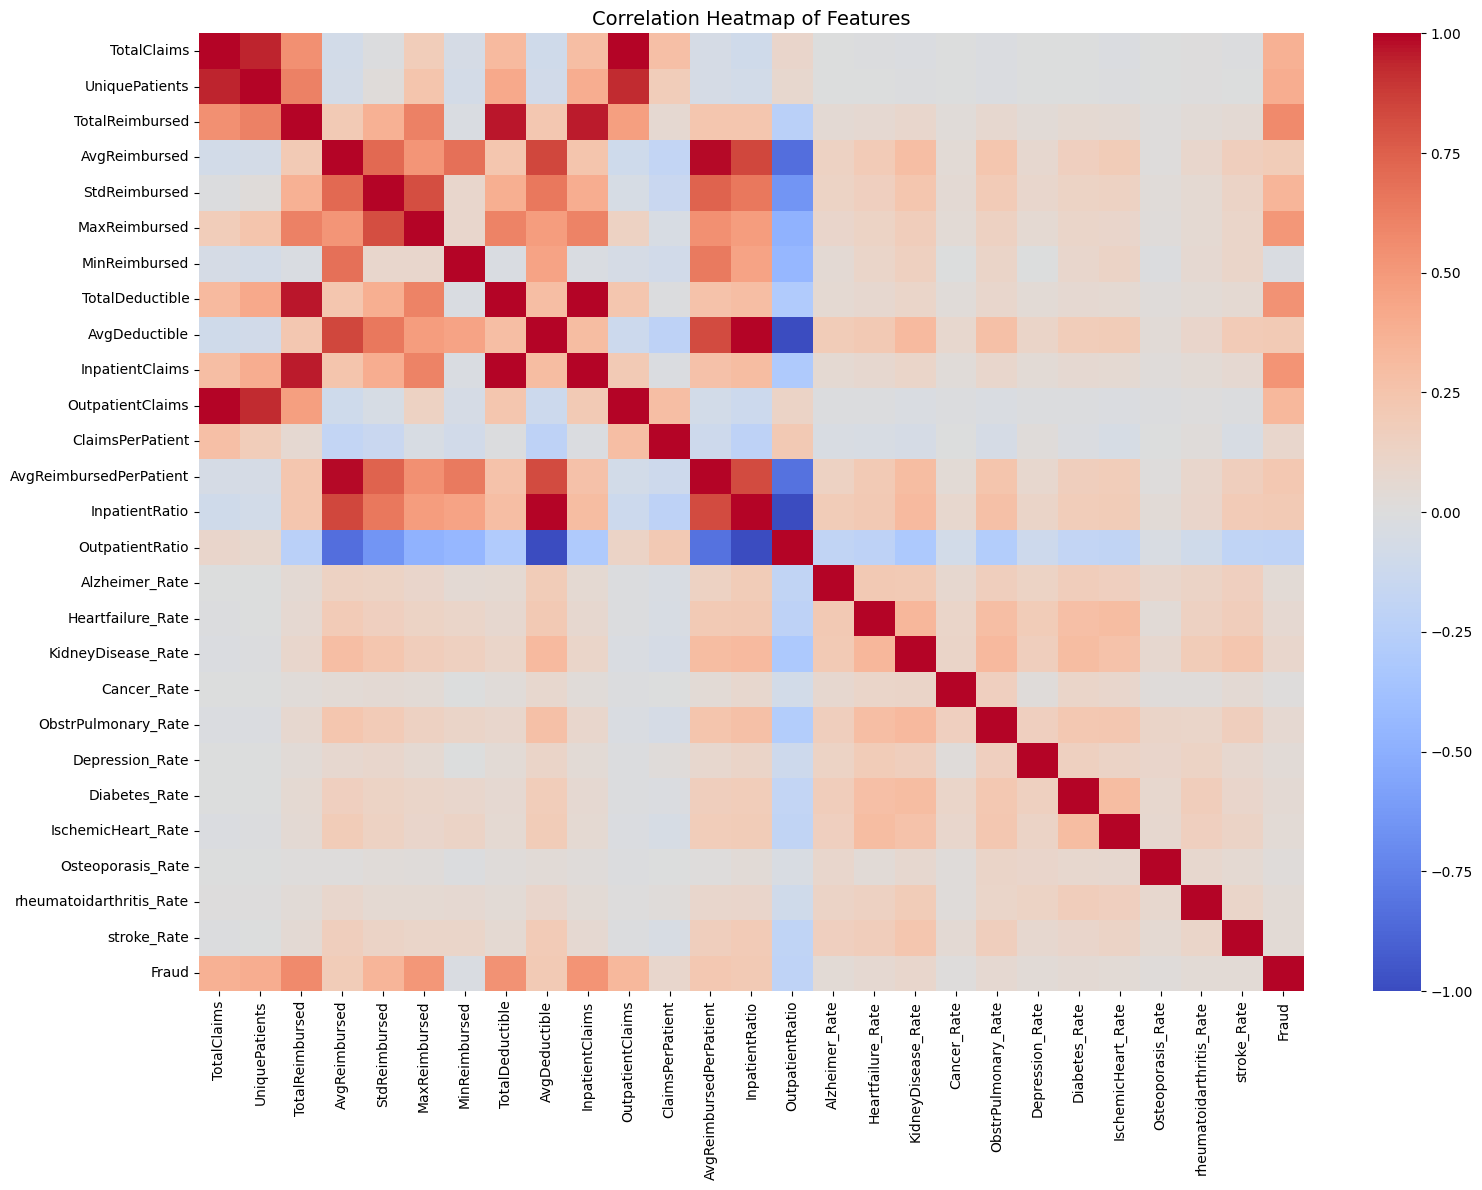

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
numeric_cols = train_final.select_dtypes(include=[np.number]).columns
correlation = train_final[numeric_cols].corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.tight_layout()
plt.show()

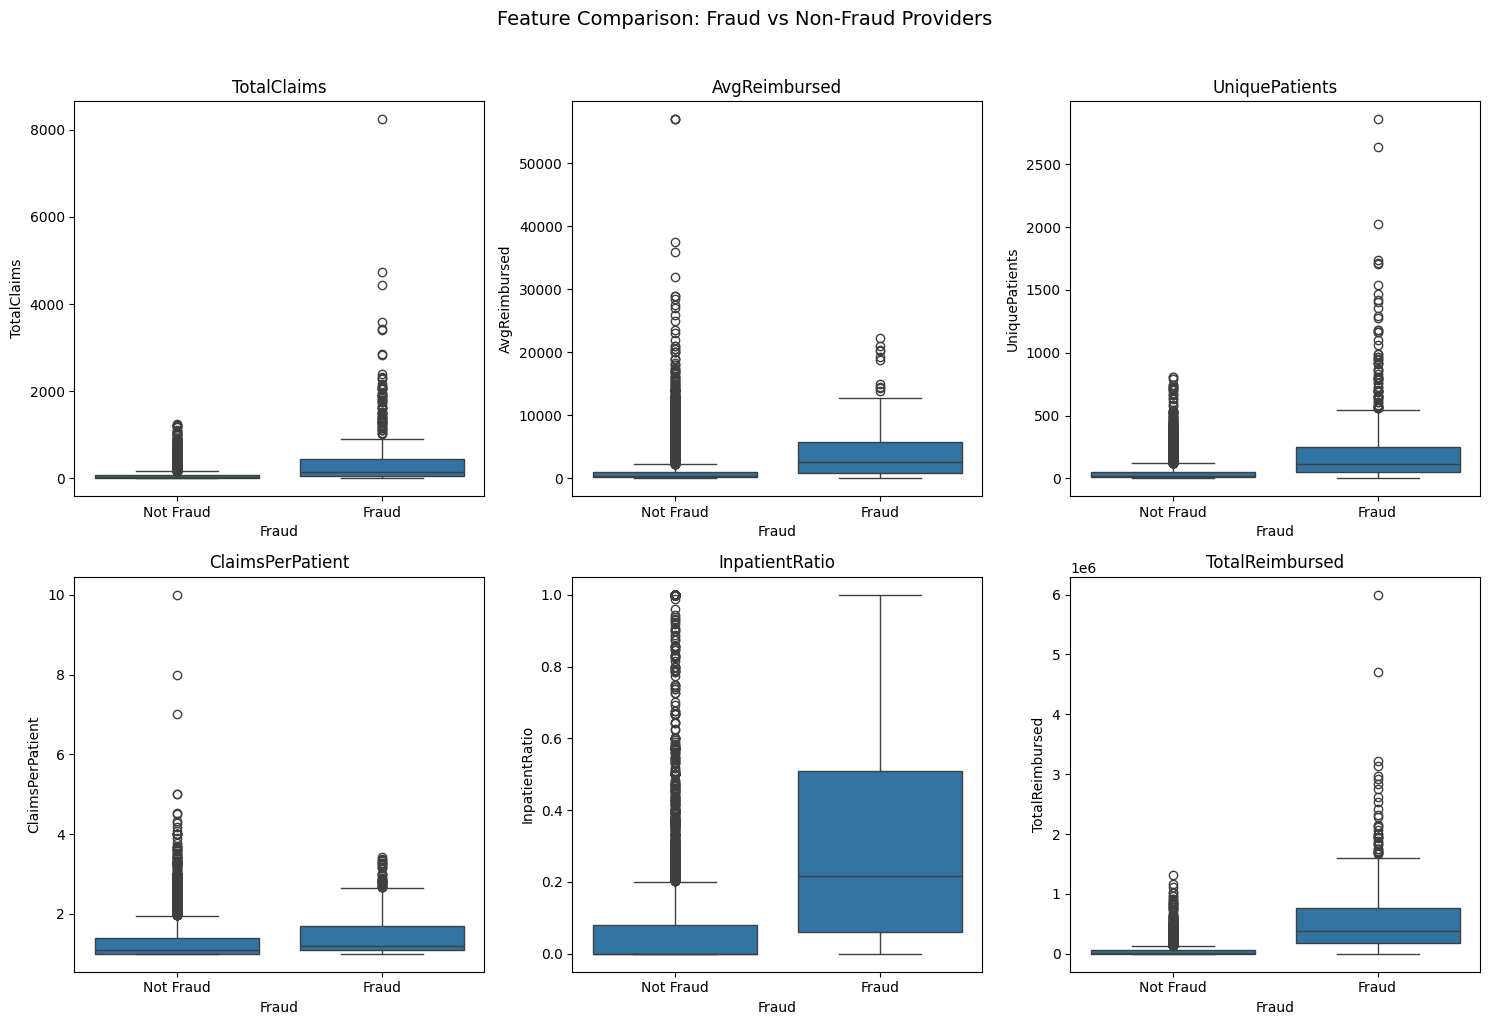

In [ ]:
# Compare features between fraud and non-fraud
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

features_to_plot = ['TotalClaims', 'AvgReimbursed', 'UniquePatients',
                    'ClaimsPerPatient', 'InpatientRatio', 'TotalReimbursed']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    sns.boxplot(data=train_final, x='Fraud', y=feature, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xticklabels(['Not Fraud', 'Fraud'])

plt.suptitle('Feature Comparison: Fraud vs Non-Fraud Providers', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Process TEST data the same way
print("=== PROCESSING TEST DATA ===")

# Mark claim types
test_inpatient['ClaimType'] = 'Inpatient'
test_outpatient['ClaimType'] = 'Outpatient'

# Combine
test_all_claims = pd.concat([test_inpatient, test_outpatient], ignore_index=True)
print(f"Total test claims: {len(test_all_claims)}")

# Create provider features
test_provider_features = test_all_claims.groupby('Provider').agg({
    'ClaimID': 'count',
    'BeneID': 'nunique',
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max', 'min'],
    'DeductibleAmtPaid': ['sum', 'mean'],
    'ClaimType': lambda x: (x == 'Inpatient').sum(),
}).reset_index()

test_provider_features.columns = [
    'Provider',
    'TotalClaims',
    'UniquePatients',
    'TotalReimbursed',
    'AvgReimbursed',
    'StdReimbursed',
    'MaxReimbursed',
    'MinReimbursed',
    'TotalDeductible',
    'AvgDeductible',
    'InpatientClaims'
]

# Add calculated features
test_provider_features['OutpatientClaims'] = test_provider_features['TotalClaims'] - test_provider_features['InpatientClaims']
test_provider_features['ClaimsPerPatient'] = test_provider_features['TotalClaims'] / test_provider_features['UniquePatients']
test_provider_features['AvgReimbursedPerPatient'] = test_provider_features['TotalReimbursed'] / test_provider_features['UniquePatients']
test_provider_features['InpatientRatio'] = test_provider_features['InpatientClaims'] / test_provider_features['TotalClaims']
test_provider_features['OutpatientRatio'] = test_provider_features['OutpatientClaims'] / test_provider_features['TotalClaims']

test_provider_features = test_provider_features.fillna(0)

print("Test provider features created!")

=== PROCESSING TEST DATA ===
Total test claims: 135392
Test provider features created!


In [ ]:
# Create test patient features
test_claims_with_bene = test_all_claims.merge(test_beneficiary, on='BeneID', how='left')

test_patient_features = test_claims_with_bene.groupby('Provider').agg({
    col: lambda x: (x == 1).mean() for col in chronic_cols
}).reset_index()

test_patient_features.columns = new_col_names

# Merge all test features
test_features = test_provider_features.merge(test_patient_features, on='Provider', how='left')
test_features = test_features.fillna(0)

# Merge with test providers (no labels, just provider IDs)
test_final = test_features.merge(test_labels, on='Provider', how='inner')

print("=== FINAL TEST DATASET ===")
print(f"Shape: {test_final.shape}")
print(f"Providers to predict: {len(test_final)}")
print("\nNote: Test data has NO fraud labels - we will PREDICT them!")

=== FINAL TEST DATASET ===
Shape: (1353, 27)
Providers to predict: 1353

Note: Test data has NO fraud labels - we will PREDICT them!


In [ ]:
# Save processed datasets
train_final.to_csv('train_processed.csv', index=False)
test_final.to_csv('test_processed.csv', index=False)

print("✓ Processed data saved!")
print("  - train_processed.csv (with labels)")
print("  - test_processed.csv (without labels - for prediction)")

✓ Processed data saved!
  - train_processed.csv (with labels)
  - test_processed.csv (without labels - for prediction)


In [ ]:
print("=" * 60)
print("DATA EXPLORATION & FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print(f"\n1. ORIGINAL DATA:")
print(f"   Training: {len(train_beneficiary)} beneficiaries, {len(train_inpatient)} inpatient, {len(train_outpatient)} outpatient")
print(f"   Test: {len(test_beneficiary)} beneficiaries, {len(test_inpatient)} inpatient, {len(test_outpatient)} outpatient")

print(f"\n2. PROCESSED DATA:")
print(f"   Training: {train_final.shape[0]} providers, {train_final.shape[1]} columns (WITH labels)")
print(f"   Test: {test_final.shape[0]} providers, {test_final.shape[1]} columns (NO labels)")

print(f"\n3. FEATURES CREATED: {len(train_features.columns) - 1}")

print(f"\n4. CLASS DISTRIBUTION (Training):")
fraud_count = train_final['Fraud'].sum()
total = len(train_final)
print(f"   Fraud: {fraud_count} ({fraud_count/total*100:.1f}%)")
print(f"   Not Fraud: {total - fraud_count} ({(total-fraud_count)/total*100:.1f}%)")

print(f"\n5. KEY INSIGHTS:")
print("    Data is IMBALANCED (~10% fraud)")
print("    Will need SMOTE or class weights in modeling")

print("\n" + "=" * 60)
print(" NOTEBOOK 1 COMPLETE!")
print("=" * 60)

DATA EXPLORATION & FEATURE ENGINEERING SUMMARY

1. ORIGINAL DATA:
   Training: 138556 beneficiaries, 40474 inpatient, 517737 outpatient
   Test: 63968 beneficiaries, 9551 inpatient, 125841 outpatient

2. PROCESSED DATA:
   Training: 5410 providers, 29 columns (WITH labels)
   Test: 1353 providers, 27 columns (NO labels)

3. FEATURES CREATED: 26

4. CLASS DISTRIBUTION (Training):
   Fraud: 506 (9.4%)
   Not Fraud: 4904 (90.6%)

5. KEY INSIGHTS:
    Data is IMBALANCED (~10% fraud)
    Will need SMOTE or class weights in modeling

 NOTEBOOK 1 COMPLETE!
